In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [10]:
df = pd.read_csv('../data/part_10.csv')
df.head()

,CLIENT_IP,CLIENT_USERAGENT,REQUEST_SIZE,RESPONSE_CODE,MATCHED_VARIABLE_SRC,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,EVENT_ID
0,188.138.92.55,NaN,166,404,REQUEST_URI,NaN,//tmp/20160925122692indo.php.vob,AVdhXFgVq1Ppo9zF5Fxu
1,93.158.215.131,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...,431,302,REQUEST_GET_ARGS,url,http://www.galitsios.gr/?option=com_k2,AVdcJmIIq1Ppo9zF2YIp
2,176.123.240.64,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,395,403,REQUEST_PATH,NaN,"/opinion/page1_3.php\"" and \""\""x\""\""=\""\""x\""",iz7SN2YBrgKk_RFNZW_U
3,73.78.81.63,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...,387,302,REQUEST_GET_ARGS,url,http://thereviewgroup.org/boss-capital/,AVdjekw4q1Ppo9zF6QT2
4,66.102.9.44,Mozilla/5.0 (Linux; Android 4.4.2; GT-N7100 Bu...,1733,404,REQUEST_GET_ARGS,REQUEST_GET_ARGS._,1516288084140,SqQGI2QB5cBXmMW1CDbp


## Data Preprocessing

In [11]:
for column in df.columns:
    print(column, np.unique(df[column].dropna().values).shape)

CLIENT_IP (24940,)
CLIENT_USERAGENT (6992,)
REQUEST_SIZE (5758,)
RESPONSE_CODE (60,)
MATCHED_VARIABLE_SRC (21,)
MATCHED_VARIABLE_NAME (3209,)
MATCHED_VARIABLE_VALUE (57611,)
EVENT_ID (54410,)


### REQUEST_SIZE analysis

In [12]:
df['REQUEST_SIZE'].dropna().shape, df['REQUEST_SIZE'].shape

((57794,), (57845,))

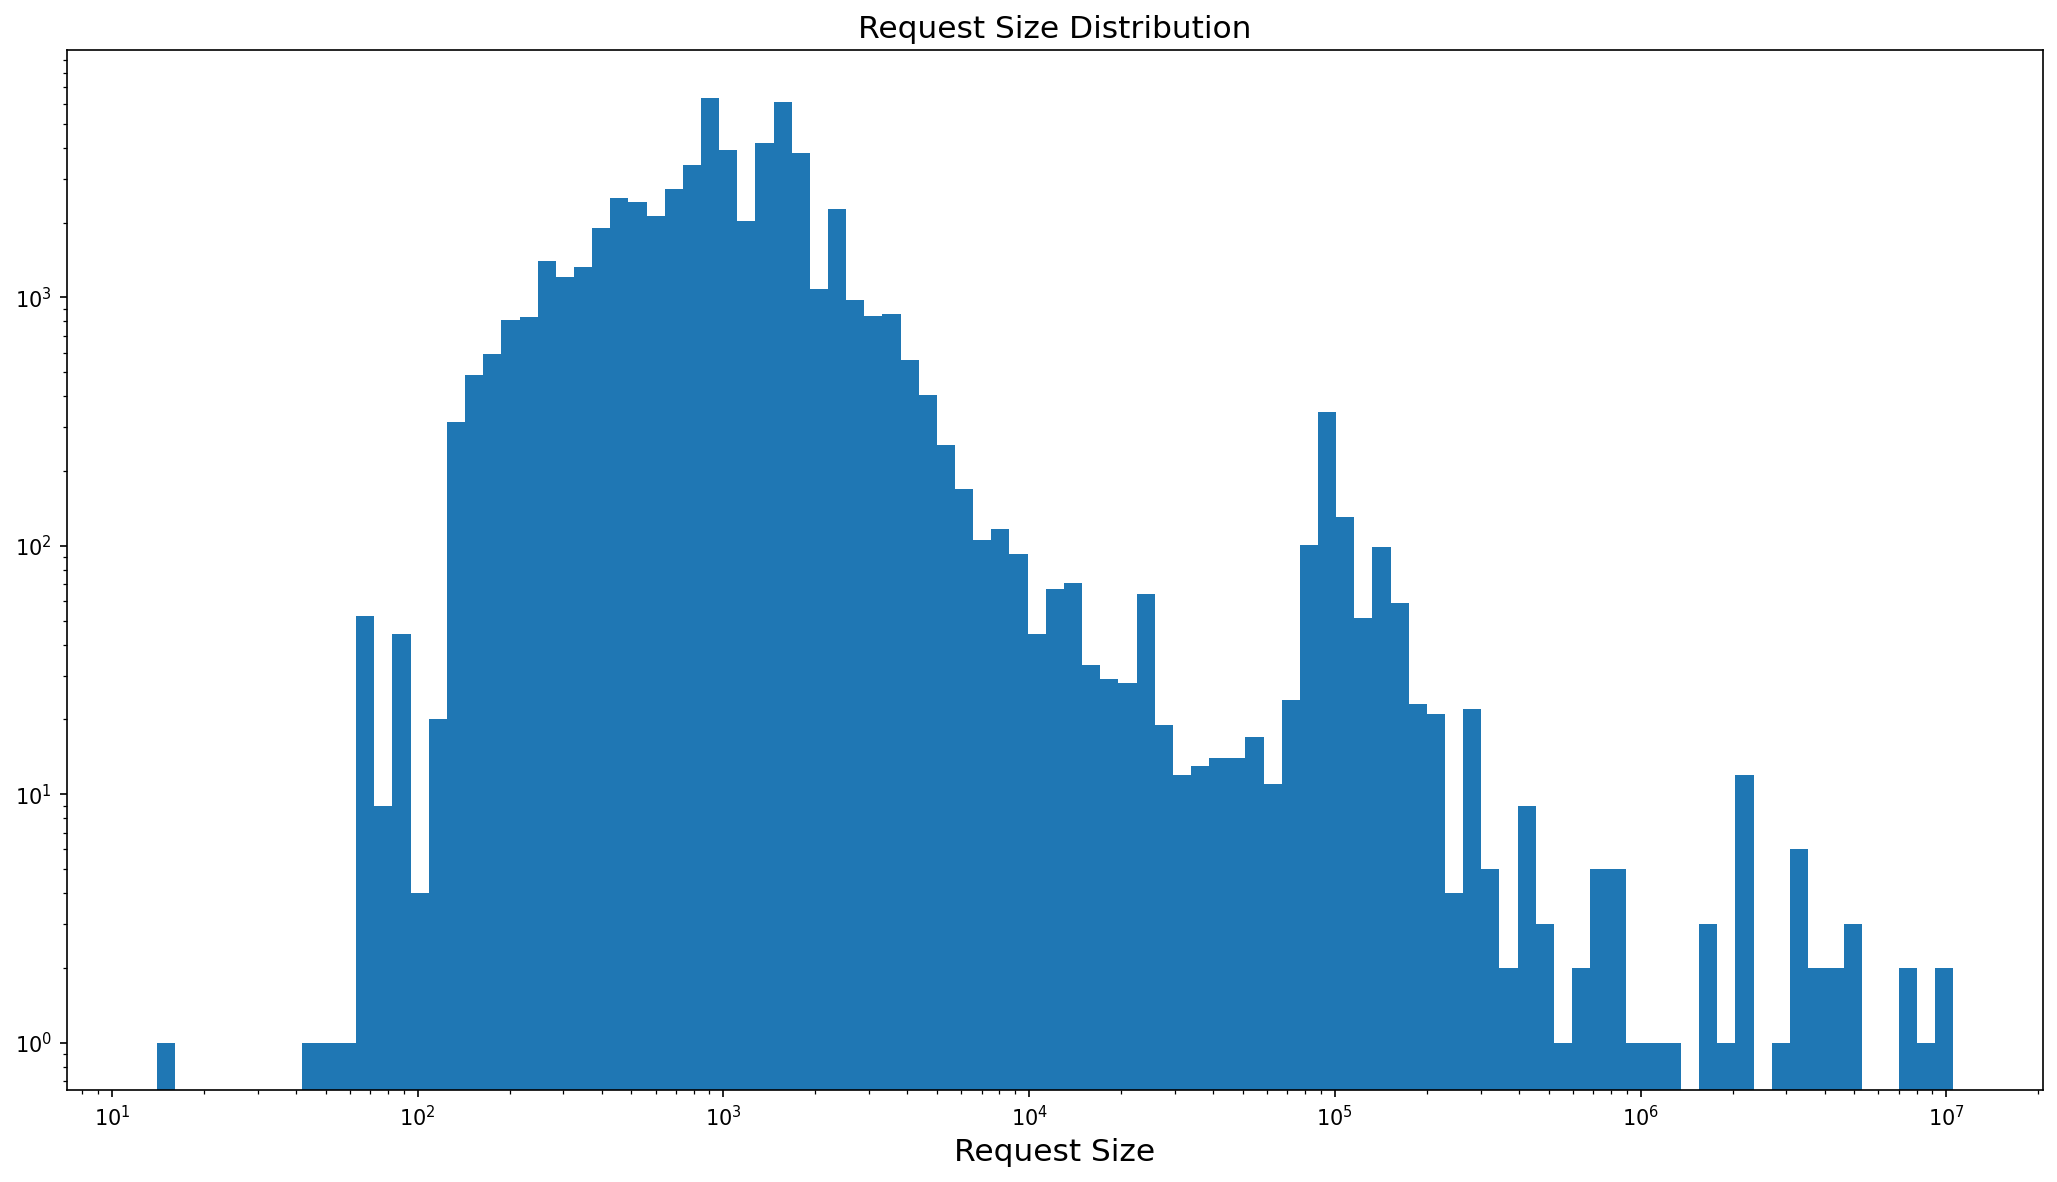

In [13]:
plt.figure(figsize=(17, 9), dpi=150)
request_size = df['REQUEST_SIZE'].dropna()[df['REQUEST_SIZE'].dropna().str.isnumeric()].astype(int).values
log_space = np.logspace(
    start=np.log10(request_size.min()-1),
    stop=np.log10(request_size.max()+1),
    num=100,
)

x, y, z= plt.hist(request_size, bins=log_space)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Request Size', fontsize=15)
plt.title('Request Size Distribution', fontsize=15)

plt.show()

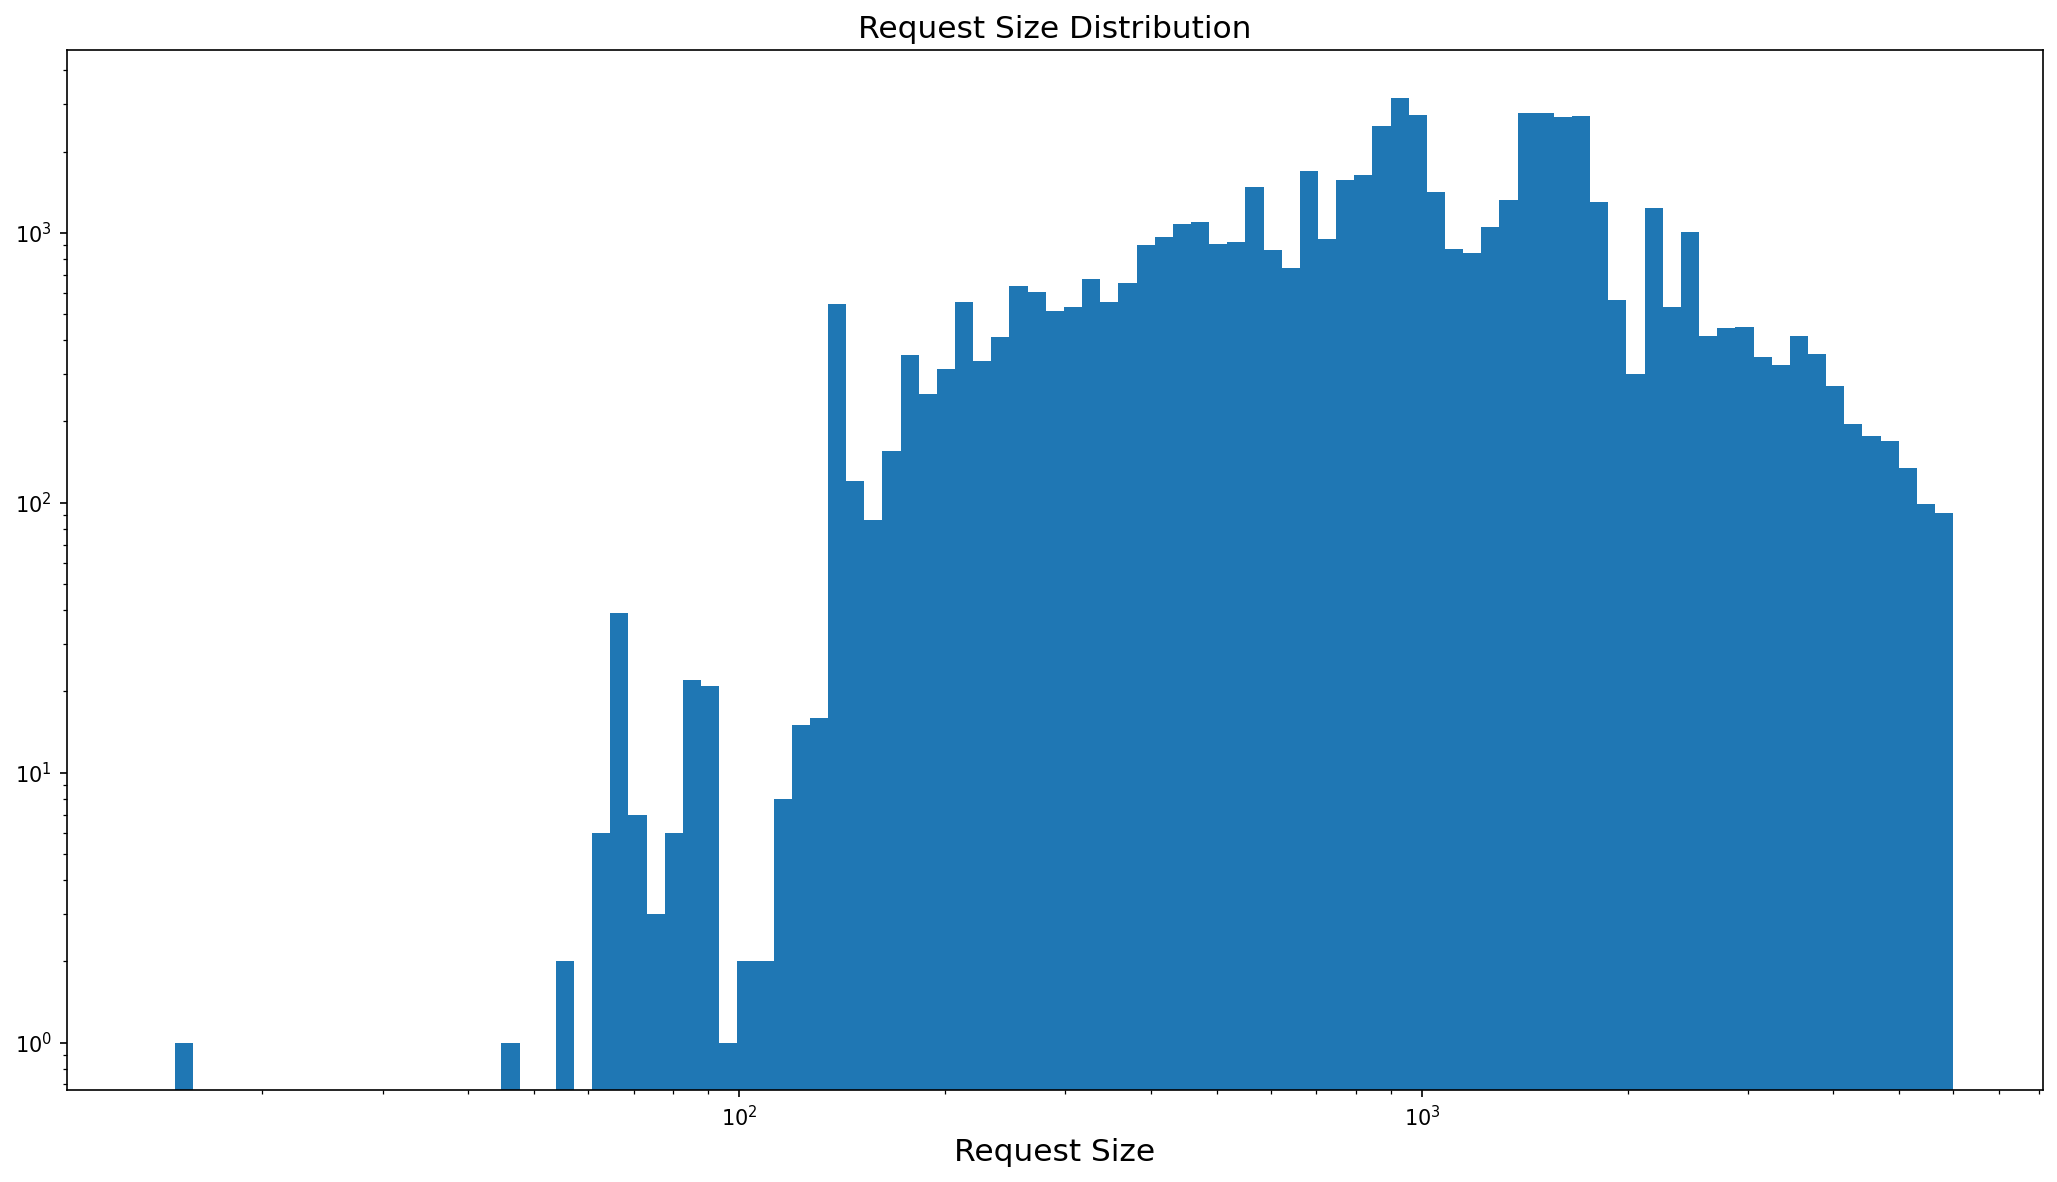

In [14]:
plt.figure(figsize=(17, 9), dpi=150)
new_request_size = request_size[request_size<6000]
log_space = np.logspace(
    start=np.log10(new_request_size.min()-1),
    stop=np.log10(new_request_size.max()+1),
    num=100,
)

x, y, z= plt.hist(new_request_size, bins=log_space)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Request Size', fontsize=15)
plt.title('Request Size Distribution', fontsize=15)

plt.show()

In [15]:
request_size_dict = {
    'LARGE_REQUEST_SIZE': [True, False, False, False],
    'NORMAL_REQUEST_SIZE': [False, True, False, False],
    'NONE_REQUEST_SIZE': [False, False, True, False],
    'ANOMALY_REQUEST_SIZE': [False, False, False, True],
}
request_array = []
for value in df['REQUEST_SIZE'].values:
    try:
        if value is np.nan:
            request_array.append(request_size_dict['NONE_REQUEST_SIZE'])
        elif value.isnumeric():
            if int(value) < 6000:
                request_array.append(request_size_dict['NORMAL_REQUEST_SIZE'])
            else:
                request_array.append(request_size_dict['LARGE_REQUEST_SIZE'])
        else:
            request_array.append(request_size_dict['ANOMALY_REQUEST_SIZE'])
    except:
        # self check
        print(value)

request_array = np.array(request_array)
print(request_array.shape)
for key, value in zip(list(request_size_dict.keys()), request_array.sum(axis=0)):
    print(f"{key}: {value}")

(57845, 4)
LARGE_REQUEST_SIZE: 1806
NORMAL_REQUEST_SIZE: 55924
NONE_REQUEST_SIZE: 51
ANOMALY_REQUEST_SIZE: 64


In [16]:
for key, column_values in zip(
    list(request_size_dict.keys()),
    request_array.T
):
    df[key] = column_values
del df['REQUEST_SIZE']

### REQUEST_SIZE analysis

In [17]:
np.unique(df['RESPONSE_CODE'].dropna(), return_counts=True)

(array(['0', '01bfebabb27b66e033b76a34951b41cb',
        '0b809ae29d22329a1ca3353f675e3dcf',
        '1999a9da38741e67e491ed9e4d6023f2',
        '1afd3c172028bc84840929251e10a8f9',
        '1f71588787ee4ee0ef301328471e64e9', '200', '204', '206', '207',
        '2bddee97b2b2ce0e9715eaf286dbedc8',
        '2f53b17df6da6bf9aeec27b0d87413c4', '301', '302', '303', '304',
        '307', '3e8c519b428c6aaff3f4e3375c70994e', '400', '401', '403',
        '404', '405', '429', '500', '502', '503', '504',
        '50a68d94b153e22135f74f7377b95cda',
        '5cae7339ed82e2077c9a5da7c92c698a',
        '5f8901bea49833ad7700dc31a9a9e3fc',
        '62233793489a0ab0e8f20644a915daa0',
        '63efc61a61cb360cf4bc705e86d9f31f',
        '6bc76f3105219540d0a22d044d4e081a',
        '71a7ec9c241cee4b50702eefbbbe31d6',
        '746197b631356af001b5ca51d2699be6',
        '74d646cee1d7d983cf7a6cef6a644040',
        '7ccc451ad8a2981f1e6f7eb6a5813246',
        '81313b14c79a583f202f1ffb179e1f32',
        '82b4c42ac

In [18]:
response_code_dict = {
    '200s_RESPONSE_CODE': [True, False, False, False, False, False],
    '300s_RESPONSE_CODE': [False, True, False, False, False, False],
    '400s_RESPONSE_CODE': [False, False, True, False, False, False],
    '500s_RESPONSE_CODE': [False, False, False, True, False, False],
    'NONE_RESPONSE_CODE': [False, False, False, False, True, False],
    'ANOMALY_RESPONSE_CODE': [False, False, False, False, False, True],
}
response_array = []
for value in df['RESPONSE_CODE'].values:
    if value is np.nan:
        response_array.append(response_code_dict['NONE_RESPONSE_CODE'])
    elif value.isnumeric():
        if int(value) >= 200 and int(value) < 300:
            response_array.append(response_code_dict['200s_RESPONSE_CODE'])
        elif int(value) >= 300 and int(value) < 400:
            response_array.append(response_code_dict['300s_RESPONSE_CODE'])
        elif int(value) >= 400 and int(value) < 500:
            response_array.append(response_code_dict['400s_RESPONSE_CODE'])
        elif int(value) >= 500 and int(value) < 600:
            response_array.append(response_code_dict['500s_RESPONSE_CODE'])
        else:
            response_array.append(response_code_dict['ANOMALY_RESPONSE_CODE'])
    else:
        response_array.append(response_code_dict['ANOMALY_RESPONSE_CODE'])

response_array = np.array(response_array)
print(response_array.shape)
for key, value in zip(list(response_code_dict.keys()), response_array.sum(axis=0)):
    print(f"{key}: {value}")

(57845, 6)
200s_RESPONSE_CODE: 25981
300s_RESPONSE_CODE: 8265
400s_RESPONSE_CODE: 21845
500s_RESPONSE_CODE: 1638
NONE_RESPONSE_CODE: 75
ANOMALY_RESPONSE_CODE: 41


In [19]:
for key, column_values in zip(
    list(response_code_dict.keys()),
    response_array.T
):
    df[key] = column_values
del df['RESPONSE_CODE']

In [20]:
df.columns

Index(['CLIENT_IP', 'CLIENT_USERAGENT', 'MATCHED_VARIABLE_SRC',
       'MATCHED_VARIABLE_NAME', 'MATCHED_VARIABLE_VALUE', 'EVENT_ID',
       'LARGE_REQUEST_SIZE', 'NORMAL_REQUEST_SIZE', 'NONE_REQUEST_SIZE',
       'ANOMALY_REQUEST_SIZE', '200s_RESPONSE_CODE', '300s_RESPONSE_CODE',
       '400s_RESPONSE_CODE', '500s_RESPONSE_CODE', 'NONE_RESPONSE_CODE',
       'ANOMALY_RESPONSE_CODE'],
      dtype='object')

### MATCHED_VARIABLE_SRC analysis

In [21]:
uniques = np.unique(df['MATCHED_VARIABLE_SRC'].dropna())

In [22]:
unique_single_values = []
for value in uniques:
    # print(value.split("\\';\\'"))
    unique_single_values.extend(value.split("\\';\\'"))
unique_single_values = list(set(unique_single_values))
# unique_single_values

In [23]:
unique_single_values

['CLIENT_IP',
 'REQUEST_FILES',
 'REQUEST_JSON',
 'REQUEST_HEADERS',
 'CLIENT_SESSION_ID',
 'REQUEST_POST_ARGS',
 'REQUEST_XML',
 'REQUEST_ARGS',
 'REQUEST_PATH',
 'REQUEST_METHOD',
 'REQUEST_HEADE',
 'RESPONSE_HEADERS',
 'REQUEST_CONTENT_TYPE',
 'CLIENT_USERAGENT',
 'REQUEST_GET_ARGS',
 'REQUEST_QUERY',
 'REQUEST_URI',
 'RESPONSE_BODY',
 'REQUEST_ARGS_KEYS',
 'REQUEST_CONTE',
 'REQUEST_COOKIES']

In [24]:
for key in unique_single_values:
    df[key+'_MATCHED_VARIABLE_SRC'] = df['MATCHED_VARIABLE_SRC'].values

# variable_scr_dict = {
#     key: value for value, key in enumerate(unique_single_values)
# }

variable_scr_array = []
for value in unique_single_values:
    df[value+'_MATCHED_VARIABLE_SRC'] = df[value+'_MATCHED_VARIABLE_SRC'].apply(lambda x: x is not np.nan and value in x)
    df[value+'_MATCHED_VARIABLE_SRC'] = df[value+'_MATCHED_VARIABLE_SRC'].astype(bool)
    
df['ANOMALY_MATCHED_VARIABLE_SRC'] = df['MATCHED_VARIABLE_SRC'].isna()

In [25]:
for value in unique_single_values:
    print(f"{value+'_MATCHED_VARIABLE_SRC'}: {df[value+'_MATCHED_VARIABLE_SRC'].sum()}")
print(f"ANOMALY_MATCHED_VARIABLE_SRC: {df['ANOMALY_MATCHED_VARIABLE_SRC'].sum()}")
del df['MATCHED_VARIABLE_SRC']

CLIENT_IP_MATCHED_VARIABLE_SRC: 1
REQUEST_FILES_MATCHED_VARIABLE_SRC: 5
REQUEST_JSON_MATCHED_VARIABLE_SRC: 587
REQUEST_HEADERS_MATCHED_VARIABLE_SRC: 4930
CLIENT_SESSION_ID_MATCHED_VARIABLE_SRC: 42
REQUEST_POST_ARGS_MATCHED_VARIABLE_SRC: 3304
REQUEST_XML_MATCHED_VARIABLE_SRC: 1959
REQUEST_ARGS_MATCHED_VARIABLE_SRC: 5034
REQUEST_PATH_MATCHED_VARIABLE_SRC: 4011
REQUEST_METHOD_MATCHED_VARIABLE_SRC: 1039
REQUEST_HEADE_MATCHED_VARIABLE_SRC: 5157
RESPONSE_HEADERS_MATCHED_VARIABLE_SRC: 3364
REQUEST_CONTENT_TYPE_MATCHED_VARIABLE_SRC: 6
CLIENT_USERAGENT_MATCHED_VARIABLE_SRC: 133
REQUEST_GET_ARGS_MATCHED_VARIABLE_SRC: 20812
REQUEST_QUERY_MATCHED_VARIABLE_SRC: 35
REQUEST_URI_MATCHED_VARIABLE_SRC: 3809
RESPONSE_BODY_MATCHED_VARIABLE_SRC: 22
REQUEST_ARGS_KEYS_MATCHED_VARIABLE_SRC: 639
REQUEST_CONTE_MATCHED_VARIABLE_SRC: 818
REQUEST_COOKIES_MATCHED_VARIABLE_SRC: 9303
ANOMALY_MATCHED_VARIABLE_SRC: 115


In [26]:
df.columns

Index(['CLIENT_IP', 'CLIENT_USERAGENT', 'MATCHED_VARIABLE_NAME',
       'MATCHED_VARIABLE_VALUE', 'EVENT_ID', 'LARGE_REQUEST_SIZE',
       'NORMAL_REQUEST_SIZE', 'NONE_REQUEST_SIZE', 'ANOMALY_REQUEST_SIZE',
       '200s_RESPONSE_CODE', '300s_RESPONSE_CODE', '400s_RESPONSE_CODE',
       '500s_RESPONSE_CODE', 'NONE_RESPONSE_CODE', 'ANOMALY_RESPONSE_CODE',
       'CLIENT_IP_MATCHED_VARIABLE_SRC', 'REQUEST_FILES_MATCHED_VARIABLE_SRC',
       'REQUEST_JSON_MATCHED_VARIABLE_SRC',
       'REQUEST_HEADERS_MATCHED_VARIABLE_SRC',
       'CLIENT_SESSION_ID_MATCHED_VARIABLE_SRC',
       'REQUEST_POST_ARGS_MATCHED_VARIABLE_SRC',
       'REQUEST_XML_MATCHED_VARIABLE_SRC', 'REQUEST_ARGS_MATCHED_VARIABLE_SRC',
       'REQUEST_PATH_MATCHED_VARIABLE_SRC',
       'REQUEST_METHOD_MATCHED_VARIABLE_SRC',
       'REQUEST_HEADE_MATCHED_VARIABLE_SRC',
       'RESPONSE_HEADERS_MATCHED_VARIABLE_SRC',
       'REQUEST_CONTENT_TYPE_MATCHED_VARIABLE_SRC',
       'CLIENT_USERAGENT_MATCHED_VARIABLE_SRC',
       'REQUE

### CLIENT_USERAGENT analysis

In [27]:
df['CLIENT_USERAGENT'].fillna("none", inplace=True)

df['LARGE_DEVICE'] = df['CLIENT_USERAGENT'].apply(lambda x: len(x.split()[0]) > 50)
df['SMALL_DEVICE'] = df['CLIENT_USERAGENT'].apply(lambda x: len(x.split()[0]) < 9)
df['NORMAL_DEVICE'] = (df['LARGE_DEVICE'] == False) & (df['SMALL_DEVICE'] == False)


df['LEN_USER_DEVICE_SPLIT_FLAG'] = df['CLIENT_USERAGENT'].apply(
    lambda x: True if len(x.split(' ')) > 4 else False
)

df['LINUX_FLAG'] = df['CLIENT_USERAGENT'].apply(lambda x: True if 'linux' in x.lower() else False)

df['WINDOWS_FLAG'] = df['CLIENT_USERAGENT'].apply(lambda x: True if 'windows' in x.lower() else False)

df['APPLE_DEVICE_FLAG'] = df['CLIENT_USERAGENT'].apply(
    lambda x: True if 'iphone' in x.lower() or 'ipad' in x.lower() else False
)

del df['CLIENT_USERAGENT']

In [28]:
df.head()

,CLIENT_IP,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,EVENT_ID,LARGE_REQUEST_SIZE,NORMAL_REQUEST_SIZE,NONE_REQUEST_SIZE,ANOMALY_REQUEST_SIZE,200s_RESPONSE_CODE,300s_RESPONSE_CODE,...,REQUEST_CONTE_MATCHED_VARIABLE_SRC,REQUEST_COOKIES_MATCHED_VARIABLE_SRC,ANOMALY_MATCHED_VARIABLE_SRC,LARGE_DEVICE,SMALL_DEVICE,NORMAL_DEVICE,LEN_USER_DEVICE_SPLIT_FLAG,LINUX_FLAG,WINDOWS_FLAG,APPLE_DEVICE_FLAG
0,188.138.92.55,NaN,//tmp/20160925122692indo.php.vob,AVdhXFgVq1Ppo9zF5Fxu,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,93.158.215.131,url,http://www.galitsios.gr/?option=com_k2,AVdcJmIIq1Ppo9zF2YIp,False,True,False,False,False,True,...,False,False,False,False,False,True,True,False,True,False
2,176.123.240.64,NaN,"/opinion/page1_3.php\"" and \""\""x\""\""=\""\""x\""",iz7SN2YBrgKk_RFNZW_U,False,True,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False
3,73.78.81.63,url,http://thereviewgroup.org/boss-capital/,AVdjekw4q1Ppo9zF6QT2,False,True,False,False,False,True,...,False,False,False,False,False,True,True,False,True,False
4,66.102.9.44,REQUEST_GET_ARGS._,1516288084140,SqQGI2QB5cBXmMW1CDbp,False,True,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False


## Illustration

### Dimentionality reduction

In [29]:
from sklearn.decomposition import PCA, LatentDirichletAllocation, NMF
from sklearn.manifold import TSNE

In [30]:
def decompose(
    df,
    n_components,
    starting_column,
    decomposition_func,
):
    features = df.iloc[:, starting_column:]
    print(features.shape)
    
    decomposition_algo = decomposition_func(n_components=n_components)
    features = decomposition_algo.fit_transform(features.values)
    print(features.shape)
    return features

In [31]:
%matplotlib inline

(57845, 39)
(57845, 2)


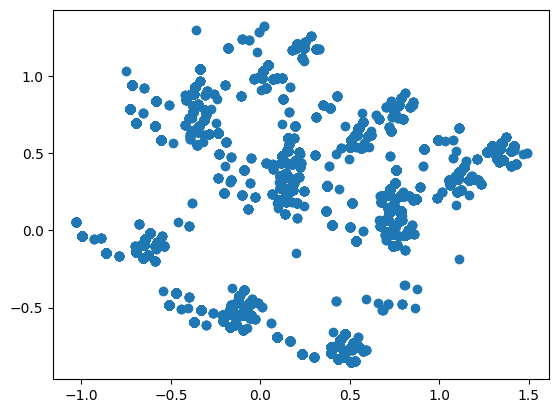

In [32]:
features = decompose(
    df, 
    n_components=2,
    starting_column=4,
    decomposition_func=PCA,
)
plt.scatter(features[:, 0], features[:, 1])
plt.show()

### Clustering 2D + illustrations

In [33]:
from sklearn.cluster import DBSCAN

In [34]:
def clasterization(
    features,
    eps, 
    min_samples,  
):
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(features)
    # highlight outliers
    cluster_data = features[clustering.labels_ == -1]
    plt.scatter(
        cluster_data[:, 0],
        cluster_data[:, 1],
        c='black'
    )

    # other labels
    for label in np.unique(clustering.labels_)[1:]:
        cluster_data = features[clustering.labels_ == label]
        plt.scatter(
            cluster_data[:, 0],
            cluster_data[:, 1],
        )
    return clustering

In [35]:
features = decompose(
    df, 
    n_components=2,
    starting_column=4,
    decomposition_func=PCA,
)

(57845, 39)
(57845, 2)


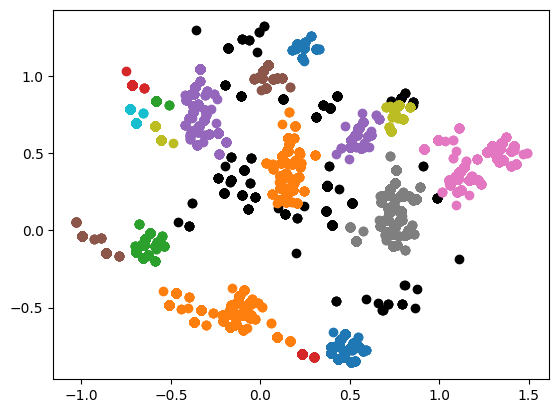

In [36]:
clustering = clasterization(
    features,
    eps=0.1, 
    min_samples=200,  
)

In [37]:
np.unique(clustering.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18])

## Labling

In [38]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [39]:
def decompose(
    df,
    n_components,
    starting_column,
    decomposition_func,
):
    features = df.iloc[:, starting_column:]
    print(features.shape)
    
    decomposition_algo = decomposition_func(n_components=n_components)
    features = decomposition_algo.fit_transform(features.values)
    print(features.shape)
    return features

In [40]:
def clasterization(
    features,
    eps, 
    min_samples,  
):
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(features)
    # highlight outliers
    return clustering

In [41]:
def labling(
    df,
    n_components = 10,
    starting_column = 4,
    decomposition_func = PCA,
    eps = 0.1,
    min_samples = 200,
):
    features = features = decompose(
        df, 
        n_components=n_components,
        starting_column=starting_column,
        decomposition_func=decomposition_func,
    )
    clustering = clasterization(
        features,
        eps=eps, 
        min_samples=min_samples,  
    )
    print(np.unique(clustering.labels_, return_counts=True))
    return clustering.labels_

In [42]:
labels = labling(
    df,
    n_components = 10,
    starting_column = 4,
    decomposition_func = PCA,
    eps = 0.1,
    min_samples = 200,
)

(57845, 39)
(57845, 10)
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52]), array([8670, 2357, 2305,  877, 6839, 4186, 1311,  720,  270,  596, 3671,
        240,  615,  297, 1349,  318,  213,  275,  601, 1142, 1172,  640,
        288,  452, 1092,  754, 1220,  792, 1172, 1691, 1473,  435, 1692,
        660,  212,  201,  342,  574, 1216,  538,  223,  213,  319,  391,
        483,  324,  430,  295,  504,  246,  223,  227,  254,  245]))


In [43]:
labels[labels!=-1]=1

In [44]:
labels

array([-1,  1, -1, ...,  1,  1,  1])

In [45]:
df['LABEL'] = labels

## Model Training

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
features = df.iloc[:, 4:-1]
target = df['LABEL']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    features, 
    target, 
    test_size=0.2, 
    stratify=target
)

In [49]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([-1,  1]), array([ 6936, 39340])),
 (array([-1,  1]), array([1734, 9835])))

In [50]:
# Взять любой алгоритм на табличных данных и обучить - не пренебрегай простыми алгоритмами))))
# Надо попробовать SVM(rbf kernel), LinearRegression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
X_train

,LARGE_REQUEST_SIZE,NORMAL_REQUEST_SIZE,NONE_REQUEST_SIZE,ANOMALY_REQUEST_SIZE,200s_RESPONSE_CODE,300s_RESPONSE_CODE,400s_RESPONSE_CODE,500s_RESPONSE_CODE,NONE_RESPONSE_CODE,ANOMALY_RESPONSE_CODE,...,REQUEST_CONTE_MATCHED_VARIABLE_SRC,REQUEST_COOKIES_MATCHED_VARIABLE_SRC,ANOMALY_MATCHED_VARIABLE_SRC,LARGE_DEVICE,SMALL_DEVICE,NORMAL_DEVICE,LEN_USER_DEVICE_SPLIT_FLAG,LINUX_FLAG,WINDOWS_FLAG,APPLE_DEVICE_FLAG
36276,False,True,False,False,True,False,False,False,False,False,...,False,True,False,False,False,True,True,False,True,False
51991,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
43280,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False
38396,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
57676,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20329,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
49085,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False
25296,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
13450,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False


In [53]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
preds = clf.predict(X_test)

In [55]:
y_test.values, preds

(array([1, 1, 1, ..., 1, 1, 1]), array([1, 1, 1, ..., 1, 1, 1]))

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          -1       0.86      0.57      0.68      1734
           1       0.93      0.98      0.95      9835

    accuracy                           0.92     11569
   macro avg       0.89      0.78      0.82     11569
weighted avg       0.92      0.92      0.91     11569



In [57]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)

SVC()

In [58]:
y_preds_svm = clf_svm.predict(X_test)

In [59]:
print(classification_report(y_preds_svm, y_test))

              precision    recall  f1-score   support

          -1       0.98      1.00      0.99      1706
           1       1.00      1.00      1.00      9863

    accuracy                           1.00     11569
   macro avg       0.99      1.00      1.00     11569
weighted avg       1.00      1.00      1.00     11569



In [60]:
# Посчитать метрики - f1_score - fbetta-score

In [61]:
# В инференс встроить обработку данных, которая представлена в Data Preprocessing

In [62]:
# Продемонстрировать инференс

## Take a look at negative class samples

In [95]:
df_bad = df[df['LABEL'] == -1]

In [96]:
df

,CLIENT_IP,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,EVENT_ID,LARGE_REQUEST_SIZE,NORMAL_REQUEST_SIZE,NONE_REQUEST_SIZE,ANOMALY_REQUEST_SIZE,200s_RESPONSE_CODE,300s_RESPONSE_CODE,...,REQUEST_COOKIES_MATCHED_VARIABLE_SRC,ANOMALY_MATCHED_VARIABLE_SRC,LARGE_DEVICE,SMALL_DEVICE,NORMAL_DEVICE,LEN_USER_DEVICE_SPLIT_FLAG,LINUX_FLAG,WINDOWS_FLAG,APPLE_DEVICE_FLAG,LABEL
0,188.138.92.55,NaN,//tmp/20160925122692indo.php.vob,AVdhXFgVq1Ppo9zF5Fxu,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,-1
1,93.158.215.131,url,http://www.galitsios.gr/?option=com_k2,AVdcJmIIq1Ppo9zF2YIp,False,True,False,False,False,True,...,False,False,False,False,True,True,False,True,False,1
2,176.123.240.64,NaN,"/opinion/page1_3.php\"" and \""\""x\""\""=\""\""x\""",iz7SN2YBrgKk_RFNZW_U,False,True,False,False,False,False,...,False,False,False,False,True,True,False,True,False,-1
3,73.78.81.63,url,http://thereviewgroup.org/boss-capital/,AVdjekw4q1Ppo9zF6QT2,False,True,False,False,False,True,...,False,False,False,False,True,True,False,True,False,1
4,66.102.9.44,REQUEST_GET_ARGS._,1516288084140,SqQGI2QB5cBXmMW1CDbp,False,True,False,False,False,False,...,False,False,False,False,True,True,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57840,217.175.140.69,REQUEST_XML./s:Envelope/s:Body/DeviceMetadataB...,DOID:USBSTOR\\Imation_USB_Flash_Drive_2,tmtVHmQB5cBXmMW1MRdz,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,1
57841,109.206.151.20,REQUEST_GET_ARGS._,1516440395935,Am-kHmQB5cBXmMW1YAcE,False,True,False,False,False,False,...,False,False,False,False,True,True,False,True,False,1
57842,89.23.32.19,REQUEST_COOKIES.User-cn,Николай Харченко,5lKlG2QB5cBXmMW1ghFl,False,True,False,False,False,False,...,True,False,False,False,True,True,False,True,False,1
57843,194.228.20.50,REQUEST_POST_ARGS.s_Unids,688D71625B88803CC125818E00471A8D;9915FD3520134...,OsTJ_mMBjksgoq1e2QnM,False,True,False,False,True,False,...,False,False,False,False,True,True,False,True,False,1


In [97]:
df[df['LARGE_REQUEST_SIZE'] == True]['LABEL'].value_counts()

-1    1083
 1     723
Name: LABEL, dtype: int64

In [98]:
df[df['NONE_REQUEST_SIZE'] == True]['LABEL'].value_counts()

-1    51
Name: LABEL, dtype: int64

In [99]:
df[df['ANOMALY_REQUEST_SIZE'] == True]['LABEL'].value_counts()

-1    64
Name: LABEL, dtype: int64

In [100]:
df[df['200s_RESPONSE_CODE'] == True]['LABEL'].value_counts()

 1    22433
-1     3548
Name: LABEL, dtype: int64

In [101]:
df[df['300s_RESPONSE_CODE'] == True]['LABEL'].value_counts()

 1    6324
-1    1941
Name: LABEL, dtype: int64

In [102]:
df[df['400s_RESPONSE_CODE'] == True]['LABEL'].value_counts()

 1    20100
-1     1745
Name: LABEL, dtype: int64

In [103]:
df.columns

Index(['CLIENT_IP', 'MATCHED_VARIABLE_NAME', 'MATCHED_VARIABLE_VALUE',
       'EVENT_ID', 'LARGE_REQUEST_SIZE', 'NORMAL_REQUEST_SIZE',
       'NONE_REQUEST_SIZE', 'ANOMALY_REQUEST_SIZE', '200s_RESPONSE_CODE',
       '300s_RESPONSE_CODE', '400s_RESPONSE_CODE', '500s_RESPONSE_CODE',
       'NONE_RESPONSE_CODE', 'ANOMALY_RESPONSE_CODE',
       'CLIENT_IP_MATCHED_VARIABLE_SRC', 'REQUEST_FILES_MATCHED_VARIABLE_SRC',
       'REQUEST_JSON_MATCHED_VARIABLE_SRC',
       'REQUEST_HEADERS_MATCHED_VARIABLE_SRC',
       'CLIENT_SESSION_ID_MATCHED_VARIABLE_SRC',
       'REQUEST_POST_ARGS_MATCHED_VARIABLE_SRC',
       'REQUEST_XML_MATCHED_VARIABLE_SRC', 'REQUEST_ARGS_MATCHED_VARIABLE_SRC',
       'REQUEST_PATH_MATCHED_VARIABLE_SRC',
       'REQUEST_METHOD_MATCHED_VARIABLE_SRC',
       'REQUEST_HEADE_MATCHED_VARIABLE_SRC',
       'RESPONSE_HEADERS_MATCHED_VARIABLE_SRC',
       'REQUEST_CONTENT_TYPE_MATCHED_VARIABLE_SRC',
       'CLIENT_USERAGENT_MATCHED_VARIABLE_SRC',
       'REQUEST_GET_ARGS_MATCHED_

In [104]:
df[df['NONE_RESPONSE_CODE'] == True]['LABEL'].value_counts()

-1    75
Name: LABEL, dtype: int64

In [105]:
df[df['ANOMALY_RESPONSE_CODE'] == True]['LABEL'].value_counts()

-1    41
Name: LABEL, dtype: int64

In [106]:
list(zip(df.columns, clf.coef_))

[('CLIENT_IP',
  array([-0.78812934,  1.16012145, -0.43792096, -0.71415971,  2.33760023,
         -0.36436461,  1.70271445, -3.23977692, -0.87506982, -0.34119189,
         -0.66292582, -1.6337757 , -1.55351443,  2.87168176, -1.69244172,
         -0.91987623,  2.32150016, -0.87453758,  0.40782828, -3.32065341,
         -2.49642314,  1.17249086, -1.75105744, -2.13525155,  2.48242186,
         -4.04132059, -0.27798764, -1.82174202,  1.06981994,  0.29639405,
          2.163706  , -1.15208067, -0.87073123, -1.17233656,  1.26297923,
         -1.13604116,  0.68739912,  2.10910971, -1.19442664]))]

In [107]:
len(df.columns[4:-1])

39

In [108]:
len(clf.coef_[0])

39

In [109]:
sorted(list(zip(df.columns[4:-1], clf.coef_[0])), key=lambda x: x[1])

[('REQUEST_QUERY_MATCHED_VARIABLE_SRC', -4.041320585848821),
 ('REQUEST_METHOD_MATCHED_VARIABLE_SRC', -3.320653410513516),
 ('500s_RESPONSE_CODE', -3.239776917247892),
 ('REQUEST_HEADE_MATCHED_VARIABLE_SRC', -2.4964231393872085),
 ('CLIENT_USERAGENT_MATCHED_VARIABLE_SRC', -2.1352515546659574),
 ('RESPONSE_BODY_MATCHED_VARIABLE_SRC', -1.8217420160421913),
 ('REQUEST_CONTENT_TYPE_MATCHED_VARIABLE_SRC', -1.751057435671682),
 ('CLIENT_SESSION_ID_MATCHED_VARIABLE_SRC', -1.6924417188889855),
 ('REQUEST_FILES_MATCHED_VARIABLE_SRC', -1.6337757015615344),
 ('REQUEST_JSON_MATCHED_VARIABLE_SRC', -1.5535144286168736),
 ('APPLE_DEVICE_FLAG', -1.1944266362016134),
 ('SMALL_DEVICE', -1.1723365626099287),
 ('ANOMALY_MATCHED_VARIABLE_SRC', -1.1520806709971065),
 ('LEN_USER_DEVICE_SPLIT_FLAG', -1.1360411620505058),
 ('REQUEST_POST_ARGS_MATCHED_VARIABLE_SRC', -0.9198762293884187),
 ('NONE_RESPONSE_CODE', -0.8750698207844466),
 ('REQUEST_ARGS_MATCHED_VARIABLE_SRC', -0.8745375808219868),
 ('LARGE_DEVICE', 

In [110]:
df[df['REQUEST_HEADERS_MATCHED_VARIABLE_SRC'] == True]['LABEL'].value_counts()

 1    3913
-1    1017
Name: LABEL, dtype: int64

In [111]:
df['REQUEST_METHOD_MATCHED_VARIABLE_SRC']

0        False
1        False
2        False
3        False
4        False
         ...  
57840    False
57841    False
57842    False
57843    False
57844    False
Name: REQUEST_METHOD_MATCHED_VARIABLE_SRC, Length: 57845, dtype: bool

In [112]:
clf_svm

SVC()

In [113]:
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(clf_svm, f)

In [114]:
df.loc[0]

CLIENT_IP                                                       188.138.92.55
MATCHED_VARIABLE_NAME                                                     NaN
MATCHED_VARIABLE_VALUE                       //tmp/20160925122692indo.php.vob
EVENT_ID                                                 AVdhXFgVq1Ppo9zF5Fxu
LARGE_REQUEST_SIZE                                                      False
NORMAL_REQUEST_SIZE                                                      True
NONE_REQUEST_SIZE                                                       False
ANOMALY_REQUEST_SIZE                                                    False
200s_RESPONSE_CODE                                                      False
300s_RESPONSE_CODE                                                      False
400s_RESPONSE_CODE                                                       True
500s_RESPONSE_CODE                                                      False
NONE_RESPONSE_CODE                                              

In [115]:
df.loc[0]

CLIENT_IP                                                       188.138.92.55
MATCHED_VARIABLE_NAME                                                     NaN
MATCHED_VARIABLE_VALUE                       //tmp/20160925122692indo.php.vob
EVENT_ID                                                 AVdhXFgVq1Ppo9zF5Fxu
LARGE_REQUEST_SIZE                                                      False
NORMAL_REQUEST_SIZE                                                      True
NONE_REQUEST_SIZE                                                       False
ANOMALY_REQUEST_SIZE                                                    False
200s_RESPONSE_CODE                                                      False
300s_RESPONSE_CODE                                                      False
400s_RESPONSE_CODE                                                       True
500s_RESPONSE_CODE                                                      False
NONE_RESPONSE_CODE                                              

## Inference

In [153]:
data = pd.read_csv('../data/part_10.csv')

In [154]:
import json

In [155]:
# data = data.loc[0]
# json_string_data = data.to_json()

In [156]:
# json_data = json.loads(json_string_data)

In [159]:
import numpy as np
import pandas as pd


def preprocess_item(item):
#     data = pd.Series(item)
    item = data
    # initializing necessary variable features
    request_size = data["REQUEST_SIZE"]
    response_code = data['RESPONSE_CODE']
    client_useragent = data['CLIENT_USERAGENT'] if not is_none(data['CLIENT_USERAGENT']) else 'none'
    device = client_useragent.split()[0]
    # extracting features from request size
    data['NONE_REQUEST_SIZE'] = is_none(request_size)
    data['NORMAL_REQUEST_SIZE'] = int(request_size) < 6000 if str(request_size).isnumeric() else False
    data['LARGE_REQUEST_SIZE'] = int(request_size) >= 6000 if str(request_size).isnumeric() else False
    data['ANOMALY_REQUEST_SIZE'] = not str(request_size).isnumeric() and not is_none(request_size)
    # extracting features from response code
    data['NONE_RESPONSE_CODE'] = is_none(response_code)
    data['200s_RESPONSE_CODE'] = 200 <= int(response_code) < 300 if str(response_code).isnumeric() else False
    data['300s_RESPONSE_CODE'] = 300 <= int(response_code) < 400 if str(response_code).isnumeric() else False
    data['400s_RESPONSE_CODE'] = 400 <= int(response_code) < 500 if str(response_code).isnumeric() else False
    data['500s_RESPONSE_CODE'] = 500 <= int(response_code) < 600 if str(response_code).isnumeric() else False
    data['ANOMALY_RESPONSE_CODE'] = int(response_code) >= 600 or int(response_code) < 200 if str(response_code).isnumeric() else not is_none(response_code)
    # extracting features from matched variable src
    matched_variable_src_uniques = [
        'REQUEST_FILES',
        'REQUEST_CONTE',
        'RESPONSE_HEADERS',
        'REQUEST_ARGS_KEYS',
        'REQUEST_CONTENT_TYPE',
        'REQUEST_COOKIES',
        'REQUEST_POST_ARGS',
        'REQUEST_ARGS',
        'CLIENT_USERAGENT',
        'RESPONSE_BODY',
        'REQUEST_URI',
        'REQUEST_METHOD',
        'CLIENT_SESSION_ID',
        'CLIENT_IP',
        'REQUEST_QUERY',
        'REQUEST_JSON',
        'REQUEST_XML',
        'REQUEST_HEADERS',
        'REQUEST_HEADE',
        'REQUEST_PATH',
        'REQUEST_GET_ARGS'
    ]
    for value in matched_variable_src_uniques:
        data[value + '_MATCHED_VARIABLE_SRC'] = value in data['MATCHED_VARIABLE_SRC'] if not is_none(data['MATCHED_VARIABLE_SRC']) else False
    data['ANOMALY_MATCHED_VARIABLE_SRC'] = is_none(data['MATCHED_VARIABLE_SRC'])
    
    # extracting features from User-Agent
    data['LARGE_DEVICE'] = len(device) > 50
    data['SMALL_DEVICE'] = len(device) < 9
    data['NORMAL_DEVICE'] = (50 >= len(device) >= 9)
    data['LEN_USER_DEVICE_SPLIT_FLAG'] = len(client_useragent.split(' ')) > 4
    data['LINUX_FLAG'] = 'linux' in client_useragent.lower()
    data['WINDOWS_FLAG'] = 'windows' in client_useragent.lower()
    data['APPLE_DEVICE_FLAG'] = 'iphone' in client_useragent.lower() or 'ipad' in client_useragent.lower()
    # deleting features unnecessary for model
    del data['REQUEST_SIZE'], \
        data["MATCHED_VARIABLE_SRC"], \
        data['RESPONSE_CODE'], \
        data['CLIENT_USERAGENT'], \
        data['CLIENT_IP'], \
        data['MATCHED_VARIABLE_NAME'], \
        data['MATCHED_VARIABLE_VALUE'], \
        data['EVENT_ID']
    # return data in format suitable for scikit-learn classifiers
    return [data]


def is_none(value):
    for none_value in [None, np.nan, "None", "none", "nan", ""]:
        if value is none_value:
            return True
    return False

In [160]:
features = preprocess_item(data)

AttributeError: 'Series' object has no attribute 'split'

In [138]:
clf_svm.predict()

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([-1])

In [144]:
comparison = clf_svm.predict(df.iloc[:, 4:-1]) == df["LABEL"]

In [149]:
df.iloc[:, 4:-1]

,LARGE_REQUEST_SIZE,NORMAL_REQUEST_SIZE,NONE_REQUEST_SIZE,ANOMALY_REQUEST_SIZE,200s_RESPONSE_CODE,300s_RESPONSE_CODE,400s_RESPONSE_CODE,500s_RESPONSE_CODE,NONE_RESPONSE_CODE,ANOMALY_RESPONSE_CODE,...,REQUEST_CONTE_MATCHED_VARIABLE_SRC,REQUEST_COOKIES_MATCHED_VARIABLE_SRC,ANOMALY_MATCHED_VARIABLE_SRC,LARGE_DEVICE,SMALL_DEVICE,NORMAL_DEVICE,LEN_USER_DEVICE_SPLIT_FLAG,LINUX_FLAG,WINDOWS_FLAG,APPLE_DEVICE_FLAG
0,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False
2,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,True,False,True,False
3,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False
4,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57840,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
57841,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,True,False,True,False
57842,False,True,False,False,False,False,True,False,False,False,...,False,True,False,False,False,True,True,False,True,False
57843,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False


In [152]:
data

CLIENT_IP                                    188.138.92.55
CLIENT_USERAGENT                                       NaN
REQUEST_SIZE                                           166
RESPONSE_CODE                                          404
MATCHED_VARIABLE_SRC                           REQUEST_URI
MATCHED_VARIABLE_NAME                                  NaN
MATCHED_VARIABLE_VALUE    //tmp/20160925122692indo.php.vob
EVENT_ID                              AVdhXFgVq1Ppo9zF5Fxu
Name: 0, dtype: object

In [146]:
comparison.sum()

57740

In [139]:
df

,CLIENT_IP,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,EVENT_ID,LARGE_REQUEST_SIZE,NORMAL_REQUEST_SIZE,NONE_REQUEST_SIZE,ANOMALY_REQUEST_SIZE,200s_RESPONSE_CODE,300s_RESPONSE_CODE,...,REQUEST_COOKIES_MATCHED_VARIABLE_SRC,ANOMALY_MATCHED_VARIABLE_SRC,LARGE_DEVICE,SMALL_DEVICE,NORMAL_DEVICE,LEN_USER_DEVICE_SPLIT_FLAG,LINUX_FLAG,WINDOWS_FLAG,APPLE_DEVICE_FLAG,LABEL
0,188.138.92.55,NaN,//tmp/20160925122692indo.php.vob,AVdhXFgVq1Ppo9zF5Fxu,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,-1
1,93.158.215.131,url,http://www.galitsios.gr/?option=com_k2,AVdcJmIIq1Ppo9zF2YIp,False,True,False,False,False,True,...,False,False,False,False,True,True,False,True,False,1
2,176.123.240.64,NaN,"/opinion/page1_3.php\"" and \""\""x\""\""=\""\""x\""",iz7SN2YBrgKk_RFNZW_U,False,True,False,False,False,False,...,False,False,False,False,True,True,False,True,False,-1
3,73.78.81.63,url,http://thereviewgroup.org/boss-capital/,AVdjekw4q1Ppo9zF6QT2,False,True,False,False,False,True,...,False,False,False,False,True,True,False,True,False,1
4,66.102.9.44,REQUEST_GET_ARGS._,1516288084140,SqQGI2QB5cBXmMW1CDbp,False,True,False,False,False,False,...,False,False,False,False,True,True,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57840,217.175.140.69,REQUEST_XML./s:Envelope/s:Body/DeviceMetadataB...,DOID:USBSTOR\\Imation_USB_Flash_Drive_2,tmtVHmQB5cBXmMW1MRdz,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,1
57841,109.206.151.20,REQUEST_GET_ARGS._,1516440395935,Am-kHmQB5cBXmMW1YAcE,False,True,False,False,False,False,...,False,False,False,False,True,True,False,True,False,1
57842,89.23.32.19,REQUEST_COOKIES.User-cn,Николай Харченко,5lKlG2QB5cBXmMW1ghFl,False,True,False,False,False,False,...,True,False,False,False,True,True,False,True,False,1
57843,194.228.20.50,REQUEST_POST_ARGS.s_Unids,688D71625B88803CC125818E00471A8D;9915FD3520134...,OsTJ_mMBjksgoq1e2QnM,False,True,False,False,True,False,...,False,False,False,False,True,True,False,True,False,1


## Drafts

In [715]:
data = pd.read_csv('../data/part_10.csv')

In [717]:
from tqdm import tqdm

for i in tqdm(range(0, len(df))):
    if not preprocess_item(json.loads(data.loc[i].to_json())).sort_index().equals(df.loc[i][4:-1].sort_index()):
        print(sorted(df.loc[0][4:-1]))
        break


  4%|███▉                                                                                            | 2350/57845 [00:11<04:37, 200.09it/s]


  8%|███████▊                                                                                        | 4720/57845 [00:23<04:24, 200.93it/s]


 12%|███████████▊                                                                                    | 7081/57845 [00:35<04:16, 197.89it/s]


 16%|███████████████▌                                                                                | 9384/57845 [00:47<04:05, 197.73it/s]


 20%|███████████████████▏                                                                           | 11682/57845 [00:59<03:49, 200.76it/s]


 24%|██████████████████████▉                                                                        | 13978/57845 [01:10<03:41, 197.62it/s]


 28%|██████████████████████████▊                                                                    | 16319/57845 [01:22<03:28, 199.24it/s]


 32%|██████████████████████████████▌                                                                | 18646/57845 [01:34<03:22, 193.62it/s]


 36%|██████████████████████████████████▍                                                            | 20970/57845 [01:46<03:04, 199.41it/s]


 40%|██████████████████████████████████████▏                                                        | 23245/57845 [01:58<03:00, 191.25it/s]


 44%|█████████████████████████████████████████▉                                                     | 25536/57845 [02:10<02:43, 197.83it/s]


 48%|█████████████████████████████████████████████▋                                                 | 27823/57845 [02:21<02:34, 194.35it/s]


 52%|█████████████████████████████████████████████████▍                                             | 30112/57845 [02:33<02:23, 193.70it/s]


 56%|█████████████████████████████████████████████████████▏                                         | 32397/57845 [02:44<02:10, 195.05it/s]


 60%|████████████████████████████████████████████████████████▉                                      | 34678/57845 [02:56<01:56, 198.70it/s]


 64%|████████████████████████████████████████████████████████████▋                                  | 36959/57845 [03:08<01:45, 197.96it/s]


 68%|████████████████████████████████████████████████████████████████▍                              | 39246/57845 [03:19<01:33, 199.83it/s]


 72%|████████████████████████████████████████████████████████████████████▎                          | 41617/57845 [03:31<01:28, 183.07it/s]


 76%|████████████████████████████████████████████████████████████████████████                       | 43896/57845 [03:43<01:11, 195.46it/s]


 80%|███████████████████████████████████████████████████████████████████████████▊                   | 46176/57845 [03:54<00:59, 194.84it/s]


 84%|███████████████████████████████████████████████████████████████████████████████▌               | 48459/57845 [04:06<00:47, 195.78it/s]


 88%|███████████████████████████████████████████████████████████████████████████████████▎           | 50737/57845 [04:18<00:35, 198.63it/s]


 92%|███████████████████████████████████████████████████████████████████████████████████████        | 53036/57845 [04:30<00:24, 195.12it/s]


 96%|██████████████████████████████████████████████████████████████████████████████████████████▊    | 55317/57845 [04:42<00:12, 199.05it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████▌| 57600/57845 [04:54<00:01, 198.61it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 57845/57845 [04:55<00:00, 195.87it/s]


In [709]:
i

1922

In [710]:
preprocess_item(json.loads(data.loc[i].to_json())).sort_index().compare(df.loc[i][4:-1].sort_index())

,self,other
ANOMALY_REQUEST_SIZE,True,False
ANOMALY_RESPONSE_CODE,True,False
NONE_REQUEST_SIZE,False,True
NONE_RESPONSE_CODE,False,True


In [742]:
data_preds = pd.read_csv("../data/output/predictions_part_10.csv")['LABEL_PRED']

In [719]:
df['LABEL'].value_counts()

 1    49175
-1     8670
Name: LABEL, dtype: int64

In [743]:
X_test.join(data_preds)

,LARGE_REQUEST_SIZE,NORMAL_REQUEST_SIZE,NONE_REQUEST_SIZE,ANOMALY_REQUEST_SIZE,200s_RESPONSE_CODE,300s_RESPONSE_CODE,400s_RESPONSE_CODE,500s_RESPONSE_CODE,NONE_RESPONSE_CODE,ANOMALY_RESPONSE_CODE,...,REQUEST_GET_ARGS_MATCHED_VARIABLE_SRC,ANOMALY_MATCHED_VARIABLE_SRC,LARGE_DEVICE,SMALL_DEVICE,NORMAL_DEVICE,LEN_USER_DEVICE_SPLIT_FLAG,LINUX_FLAG,WINDOWS_FLAG,APPLE_DEVICE_FLAG,LABEL_PRED
13179,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,True,True,True,False,False,1
8740,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,True,True,False,True,False,-1
44648,False,True,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,-1
55504,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,True,True,True,False,False,-1
42227,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,True,True,False,False,True,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,-1
25084,False,True,False,False,False,True,False,False,False,False,...,True,False,False,False,True,True,False,True,False,1
56088,False,True,False,False,False,False,True,False,False,False,...,True,False,False,False,True,True,False,True,False,1
48229,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,True,True,False,True,False,-1


In [746]:
df

,CLIENT_IP,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,EVENT_ID,LARGE_REQUEST_SIZE,NORMAL_REQUEST_SIZE,NONE_REQUEST_SIZE,ANOMALY_REQUEST_SIZE,200s_RESPONSE_CODE,300s_RESPONSE_CODE,...,REQUEST_GET_ARGS_MATCHED_VARIABLE_SRC,ANOMALY_MATCHED_VARIABLE_SRC,LARGE_DEVICE,SMALL_DEVICE,NORMAL_DEVICE,LEN_USER_DEVICE_SPLIT_FLAG,LINUX_FLAG,WINDOWS_FLAG,APPLE_DEVICE_FLAG,LABEL
0,188.138.92.55,NaN,//tmp/20160925122692indo.php.vob,AVdhXFgVq1Ppo9zF5Fxu,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,-1
1,93.158.215.131,url,http://www.galitsios.gr/?option=com_k2,AVdcJmIIq1Ppo9zF2YIp,False,True,False,False,False,True,...,True,False,False,False,True,True,False,True,False,1
2,176.123.240.64,NaN,"/opinion/page1_3.php\"" and \""\""x\""\""=\""\""x\""",iz7SN2YBrgKk_RFNZW_U,False,True,False,False,False,False,...,False,False,False,False,True,True,False,True,False,-1
3,73.78.81.63,url,http://thereviewgroup.org/boss-capital/,AVdjekw4q1Ppo9zF6QT2,False,True,False,False,False,True,...,True,False,False,False,True,True,False,True,False,1
4,66.102.9.44,REQUEST_GET_ARGS._,1516288084140,SqQGI2QB5cBXmMW1CDbp,False,True,False,False,False,False,...,True,False,False,False,True,True,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57840,217.175.140.69,REQUEST_XML./s:Envelope/s:Body/DeviceMetadataB...,DOID:USBSTOR\\Imation_USB_Flash_Drive_2,tmtVHmQB5cBXmMW1MRdz,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,1
57841,109.206.151.20,REQUEST_GET_ARGS._,1516440395935,Am-kHmQB5cBXmMW1YAcE,False,True,False,False,False,False,...,True,False,False,False,True,True,False,True,False,1
57842,89.23.32.19,REQUEST_COOKIES.User-cn,Николай Харченко,5lKlG2QB5cBXmMW1ghFl,False,True,False,False,False,False,...,False,False,False,False,True,True,False,True,False,1
57843,194.228.20.50,REQUEST_POST_ARGS.s_Unids,688D71625B88803CC125818E00471A8D;9915FD3520134...,OsTJ_mMBjksgoq1e2QnM,False,True,False,False,True,False,...,False,False,False,False,True,True,False,True,False,1


In [748]:
df.loc[2].to_json()

'{"CLIENT_IP":"176.123.240.64","MATCHED_VARIABLE_NAME":null,"MATCHED_VARIABLE_VALUE":"\\/opinion\\/page1_3.php\\\\\\" and \\\\\\"\\\\\\"x\\\\\\"\\\\\\"=\\\\\\"\\\\\\"x\\\\\\"","EVENT_ID":"iz7SN2YBrgKk_RFNZW_U","LARGE_REQUEST_SIZE":false,"NORMAL_REQUEST_SIZE":true,"NONE_REQUEST_SIZE":false,"ANOMALY_REQUEST_SIZE":false,"200s_RESPONSE_CODE":false,"300s_RESPONSE_CODE":false,"400s_RESPONSE_CODE":true,"500s_RESPONSE_CODE":false,"NONE_RESPONSE_CODE":false,"ANOMALY_RESPONSE_CODE":false,"REQUEST_FILES_MATCHED_VARIABLE_SRC":false,"REQUEST_CONTE_MATCHED_VARIABLE_SRC":false,"RESPONSE_HEADERS_MATCHED_VARIABLE_SRC":false,"REQUEST_ARGS_KEYS_MATCHED_VARIABLE_SRC":false,"REQUEST_CONTENT_TYPE_MATCHED_VARIABLE_SRC":false,"REQUEST_COOKIES_MATCHED_VARIABLE_SRC":false,"REQUEST_POST_ARGS_MATCHED_VARIABLE_SRC":false,"REQUEST_ARGS_MATCHED_VARIABLE_SRC":false,"CLIENT_USERAGENT_MATCHED_VARIABLE_SRC":false,"RESPONSE_BODY_MATCHED_VARIABLE_SRC":false,"REQUEST_URI_MATCHED_VARIABLE_SRC":false,"REQUEST_METHOD_MATCHED_

In [750]:
data.loc[2].to_json()

'{"CLIENT_IP":"176.123.240.64","CLIENT_USERAGENT":"Mozilla\\/5.0 (Windows NT 6.0; rv:34.0) Gecko\\/20100101 Firefox\\/34.0","REQUEST_SIZE":"395","RESPONSE_CODE":"403","MATCHED_VARIABLE_SRC":"REQUEST_PATH","MATCHED_VARIABLE_NAME":null,"MATCHED_VARIABLE_VALUE":"\\/opinion\\/page1_3.php\\\\\\" and \\\\\\"\\\\\\"x\\\\\\"\\\\\\"=\\\\\\"\\\\\\"x\\\\\\"","EVENT_ID":"iz7SN2YBrgKk_RFNZW_U"}'

In [90]:
import pickle
with open('./svm.pkl', 'rb') as f:
    classifier = pickle.load(f)

In [91]:
classifier

SVC()

In [92]:
df

,CLIENT_IP,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,EVENT_ID,LARGE_REQUEST_SIZE,NORMAL_REQUEST_SIZE,NONE_REQUEST_SIZE,ANOMALY_REQUEST_SIZE,200s_RESPONSE_CODE,300s_RESPONSE_CODE,...,REQUEST_COOKIES_MATCHED_VARIABLE_SRC,ANOMALY_MATCHED_VARIABLE_SRC,LARGE_DEVICE,SMALL_DEVICE,NORMAL_DEVICE,LEN_USER_DEVICE_SPLIT_FLAG,LINUX_FLAG,WINDOWS_FLAG,APPLE_DEVICE_FLAG,LABEL
0,188.138.92.55,NaN,//tmp/20160925122692indo.php.vob,AVdhXFgVq1Ppo9zF5Fxu,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,-1
1,93.158.215.131,url,http://www.galitsios.gr/?option=com_k2,AVdcJmIIq1Ppo9zF2YIp,False,True,False,False,False,True,...,False,False,False,False,True,True,False,True,False,1
2,176.123.240.64,NaN,"/opinion/page1_3.php\"" and \""\""x\""\""=\""\""x\""",iz7SN2YBrgKk_RFNZW_U,False,True,False,False,False,False,...,False,False,False,False,True,True,False,True,False,-1
3,73.78.81.63,url,http://thereviewgroup.org/boss-capital/,AVdjekw4q1Ppo9zF6QT2,False,True,False,False,False,True,...,False,False,False,False,True,True,False,True,False,1
4,66.102.9.44,REQUEST_GET_ARGS._,1516288084140,SqQGI2QB5cBXmMW1CDbp,False,True,False,False,False,False,...,False,False,False,False,True,True,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57840,217.175.140.69,REQUEST_XML./s:Envelope/s:Body/DeviceMetadataB...,DOID:USBSTOR\\Imation_USB_Flash_Drive_2,tmtVHmQB5cBXmMW1MRdz,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,1
57841,109.206.151.20,REQUEST_GET_ARGS._,1516440395935,Am-kHmQB5cBXmMW1YAcE,False,True,False,False,False,False,...,False,False,False,False,True,True,False,True,False,1
57842,89.23.32.19,REQUEST_COOKIES.User-cn,Николай Харченко,5lKlG2QB5cBXmMW1ghFl,False,True,False,False,False,False,...,True,False,False,False,True,True,False,True,False,1
57843,194.228.20.50,REQUEST_POST_ARGS.s_Unids,688D71625B88803CC125818E00471A8D;9915FD3520134...,OsTJ_mMBjksgoq1e2QnM,False,True,False,False,True,False,...,False,False,False,False,True,True,False,True,False,1


In [93]:
df.head(20)

,CLIENT_IP,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,EVENT_ID,LARGE_REQUEST_SIZE,NORMAL_REQUEST_SIZE,NONE_REQUEST_SIZE,ANOMALY_REQUEST_SIZE,200s_RESPONSE_CODE,300s_RESPONSE_CODE,...,REQUEST_COOKIES_MATCHED_VARIABLE_SRC,ANOMALY_MATCHED_VARIABLE_SRC,LARGE_DEVICE,SMALL_DEVICE,NORMAL_DEVICE,LEN_USER_DEVICE_SPLIT_FLAG,LINUX_FLAG,WINDOWS_FLAG,APPLE_DEVICE_FLAG,LABEL
0,188.138.92.55,NaN,//tmp/20160925122692indo.php.vob,AVdhXFgVq1Ppo9zF5Fxu,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,-1
1,93.158.215.131,url,http://www.galitsios.gr/?option=com_k2,AVdcJmIIq1Ppo9zF2YIp,False,True,False,False,False,True,...,False,False,False,False,True,True,False,True,False,1
2,176.123.240.64,NaN,"/opinion/page1_3.php\"" and \""\""x\""\""=\""\""x\""",iz7SN2YBrgKk_RFNZW_U,False,True,False,False,False,False,...,False,False,False,False,True,True,False,True,False,-1
3,73.78.81.63,url,http://thereviewgroup.org/boss-capital/,AVdjekw4q1Ppo9zF6QT2,False,True,False,False,False,True,...,False,False,False,False,True,True,False,True,False,1
4,66.102.9.44,REQUEST_GET_ARGS._,1516288084140,SqQGI2QB5cBXmMW1CDbp,False,True,False,False,False,False,...,False,False,False,False,True,True,True,False,False,1
5,79.183.87.247,REQUEST_HEADERS.User-Agent,Mozilla/5.0 (Linux; Android 6.0; LG-H815 Build...,nFzwHGQB5cBXmMW1y_TD,False,True,False,False,False,False,...,False,False,False,False,True,True,True,False,False,1
6,88.198.201.245,REQUEST_GET_ARGS.rid,3585221644,9KP-ImQB5cBXmMW1yeXY,False,True,False,False,False,True,...,False,False,False,False,True,True,False,True,False,1
7,77.72.142.170,REQUEST_GET_ARGS._,214296569,97JpJGQB5cBXmMW1WqBh,False,True,False,False,False,False,...,False,False,False,False,True,True,False,True,False,1
8,94.50.192.153,NaN,POST\';\'multipart/form-data; boundary=----Web...,irs7_mMBjksgoq1eoQ7a,False,True,False,False,False,False,...,False,False,False,False,True,True,False,True,False,-1
9,83.246.141.54,REQUEST_GET_ARGS._,51660445,g4RdIGQB5cBXmMW10nGg,False,True,False,False,False,False,...,False,False,False,False,True,True,False,True,False,1


In [94]:
data

NameError: name 'data' is not defined